<a href="https://colab.research.google.com/github/saikirankesoju/AIML/blob/main/AIML%20--%20ASS-6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
#PART-01
# Import the required packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report

# Load the classified dataset into a dataframe
df = pd.read_csv('/content/Classified_Data.txt')

# Check the data types of each feature (column) in the dataset
print(df.dtypes)

# Generate a summary of the dataset for min, max, stddev, quartile values for 25%, 50%, 75%, 90%
print(df.describe(percentiles=[.25, .5, .75, .90]))

# List the names of columns/features in the dataset
print(df.columns)

# Scale the features using StandardScaler and transform the data
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df.drop('Unnamed: 0', axis=1))  # Assuming 'target' is the label column
df_scaled = pd.DataFrame(scaled_features, columns=df.columns[:-1])

Unnamed: 0        int64
WTT             float64
PTI             float64
EQW             float64
SBI             float64
LQE             float64
QWG             float64
FDJ             float64
PJF             float64
HQE             float64
NXJ             float64
TARGET CLASS      int64
dtype: object
        Unnamed: 0          WTT          PTI          EQW          SBI  \
count  1000.000000  1000.000000  1000.000000  1000.000000  1000.000000   
mean    499.500000     0.949682     1.114303     0.834127     0.682099   
std     288.819436     0.289635     0.257085     0.291554     0.229645   
min       0.000000     0.174412     0.441398     0.170924     0.045027   
25%     249.750000     0.742358     0.942071     0.615451     0.515010   
50%     499.500000     0.940475     1.118486     0.813264     0.676835   
75%     749.250000     1.163295     1.307904     1.028340     0.834317   
90%     899.100000     1.336612     1.441901     1.223127     0.983470   
max     999.000000     1.721779 

In [16]:
#PART-02
# 1. Split the data generated from list created as X, Y
X_train, X_test, y_train, y_test = train_test_split(df_scaled, df['Unnamed: 0'], test_size=0.2, random_state=42)

# 2. Apply the KNN Classifier model of sklearn.neighbors
knn = KNeighborsClassifier(n_neighbors=5)  # You can adjust 'n_neighbors'

# 3. Fit the data to the Classifier Model
knn.fit(X_train, y_train)

# Predict the labels for the test set
y_pred = knn.predict(X_test)

Confusion Matrix:
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


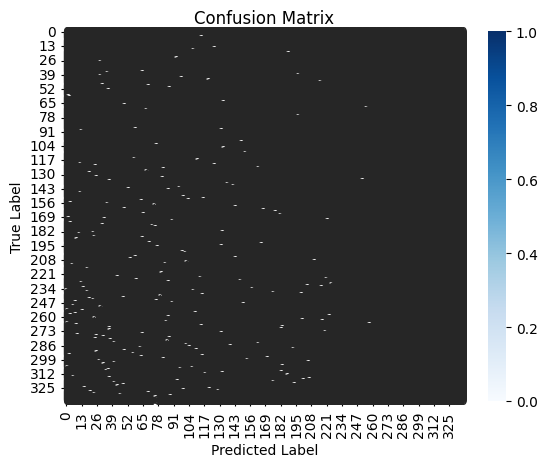

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       0.0
           1       0.00      0.00      0.00       0.0
           3       0.00      0.00      0.00       0.0
           4       0.00      0.00      0.00       0.0
           5       0.00      0.00      0.00       0.0
           7       0.00      0.00      0.00       0.0
           8       0.00      0.00      0.00       0.0
          10       0.00      0.00      0.00       1.0
          11       0.00      0.00      0.00       0.0
          12       0.00      0.00      0.00       0.0
          14       0.00      0.00      0.00       0.0
          15       0.00      0.00      0.00       0.0
          16       0.00      0.00      0.00       0.0
          17       0.00      0.00      0.00       0.0
          19       0.00      0.00      0.00       0.0
          20       0.00      0.00      0.00       0.0
          21       0.00      0.00      0.00       0.0
    

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.

In [18]:
#PART-03
# 1. Generate the confusion matrix to estimate the correction among features
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Visualize the confusion matrix using seaborn heatmap
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# 2. Generate the classification report
print("Classification Report:")
class_report = classification_report(y_test, y_pred)
print(class_report)